In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

import seaborn as sns

pd.set_option('display.max_rows', None)
df_wpm = pd.read_csv('~/SpeedTyping/wpmhistory.csv')

In [3]:
df_wpm.head(3)

,rank,name,wpm,raw,accuracy,consistency,diff
0,1,67e2fb54f65fb0e23ff5e843,130.79,140.58,95.08,80.64,9.79
1,2,67e0c80df65fb0e23fdb94f1,125.40,134.80,95.44,77.52,9.40
2,3,67e2faa3f65fb0e23ff5ddc1,123.60,130.00,96.47,75.68,6.40


In [28]:
df_wpm[['wpm','raw','accuracy','consistency']].describe().round(1)

,wpm,raw,accuracy,consistency
count,255.0,255.0,255.0,255.0
mean,104.6,126.1,88.6,72.4
std,9.6,10.1,4.4,4.3
min,70.8,91.6,76.5,58.1
25%,99.1,120.2,85.6,69.6
50%,104.6,127.2,89.2,72.5
75%,111.0,132.7,92.0,75.8
max,130.8,148.4,97.3,81.1


In [7]:
def pltscat(df,dfx,dfy,dfs,dfc,note):
    dfp=df.copy()
    sz=dfp[dfs]
    sz=sz.max()-sz
    sz=(sz.max()-sz)
    sz=(1000*(sz/sz.max())**1.5)+20
    plt.figure(figsize=(40, 17))
    plt.scatter(dfp[dfx],dfp[dfy],sz,c=dfp[dfc],cmap='spring',alpha=.75 )
    plt.gca().set_facecolor((.1, .1, .1, .80))
    cbar=plt.colorbar()
    cbar.set_label(dfc,fontsize=20)
    plt.ylabel(dfy,fontsize=20)
    plt.xlabel(dfx,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(facecolor=(.5, .5,.5, 0.95), edgecolor='black',fontsize=20)
    plt.figtext(
        x=0.53, y=.23,  # x=0.5 centers it, y=-0.1 places it below the x-axis
        s=note,
        fontsize=24, color="black", ha="center",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="gray")
    )
    plt.show

C:\Users\conne\AppData\Local\Temp\ipykernel_23668\439492108.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(facecolor=(.5, .5,.5, 0.95), edgecolor='black',fontsize=20)


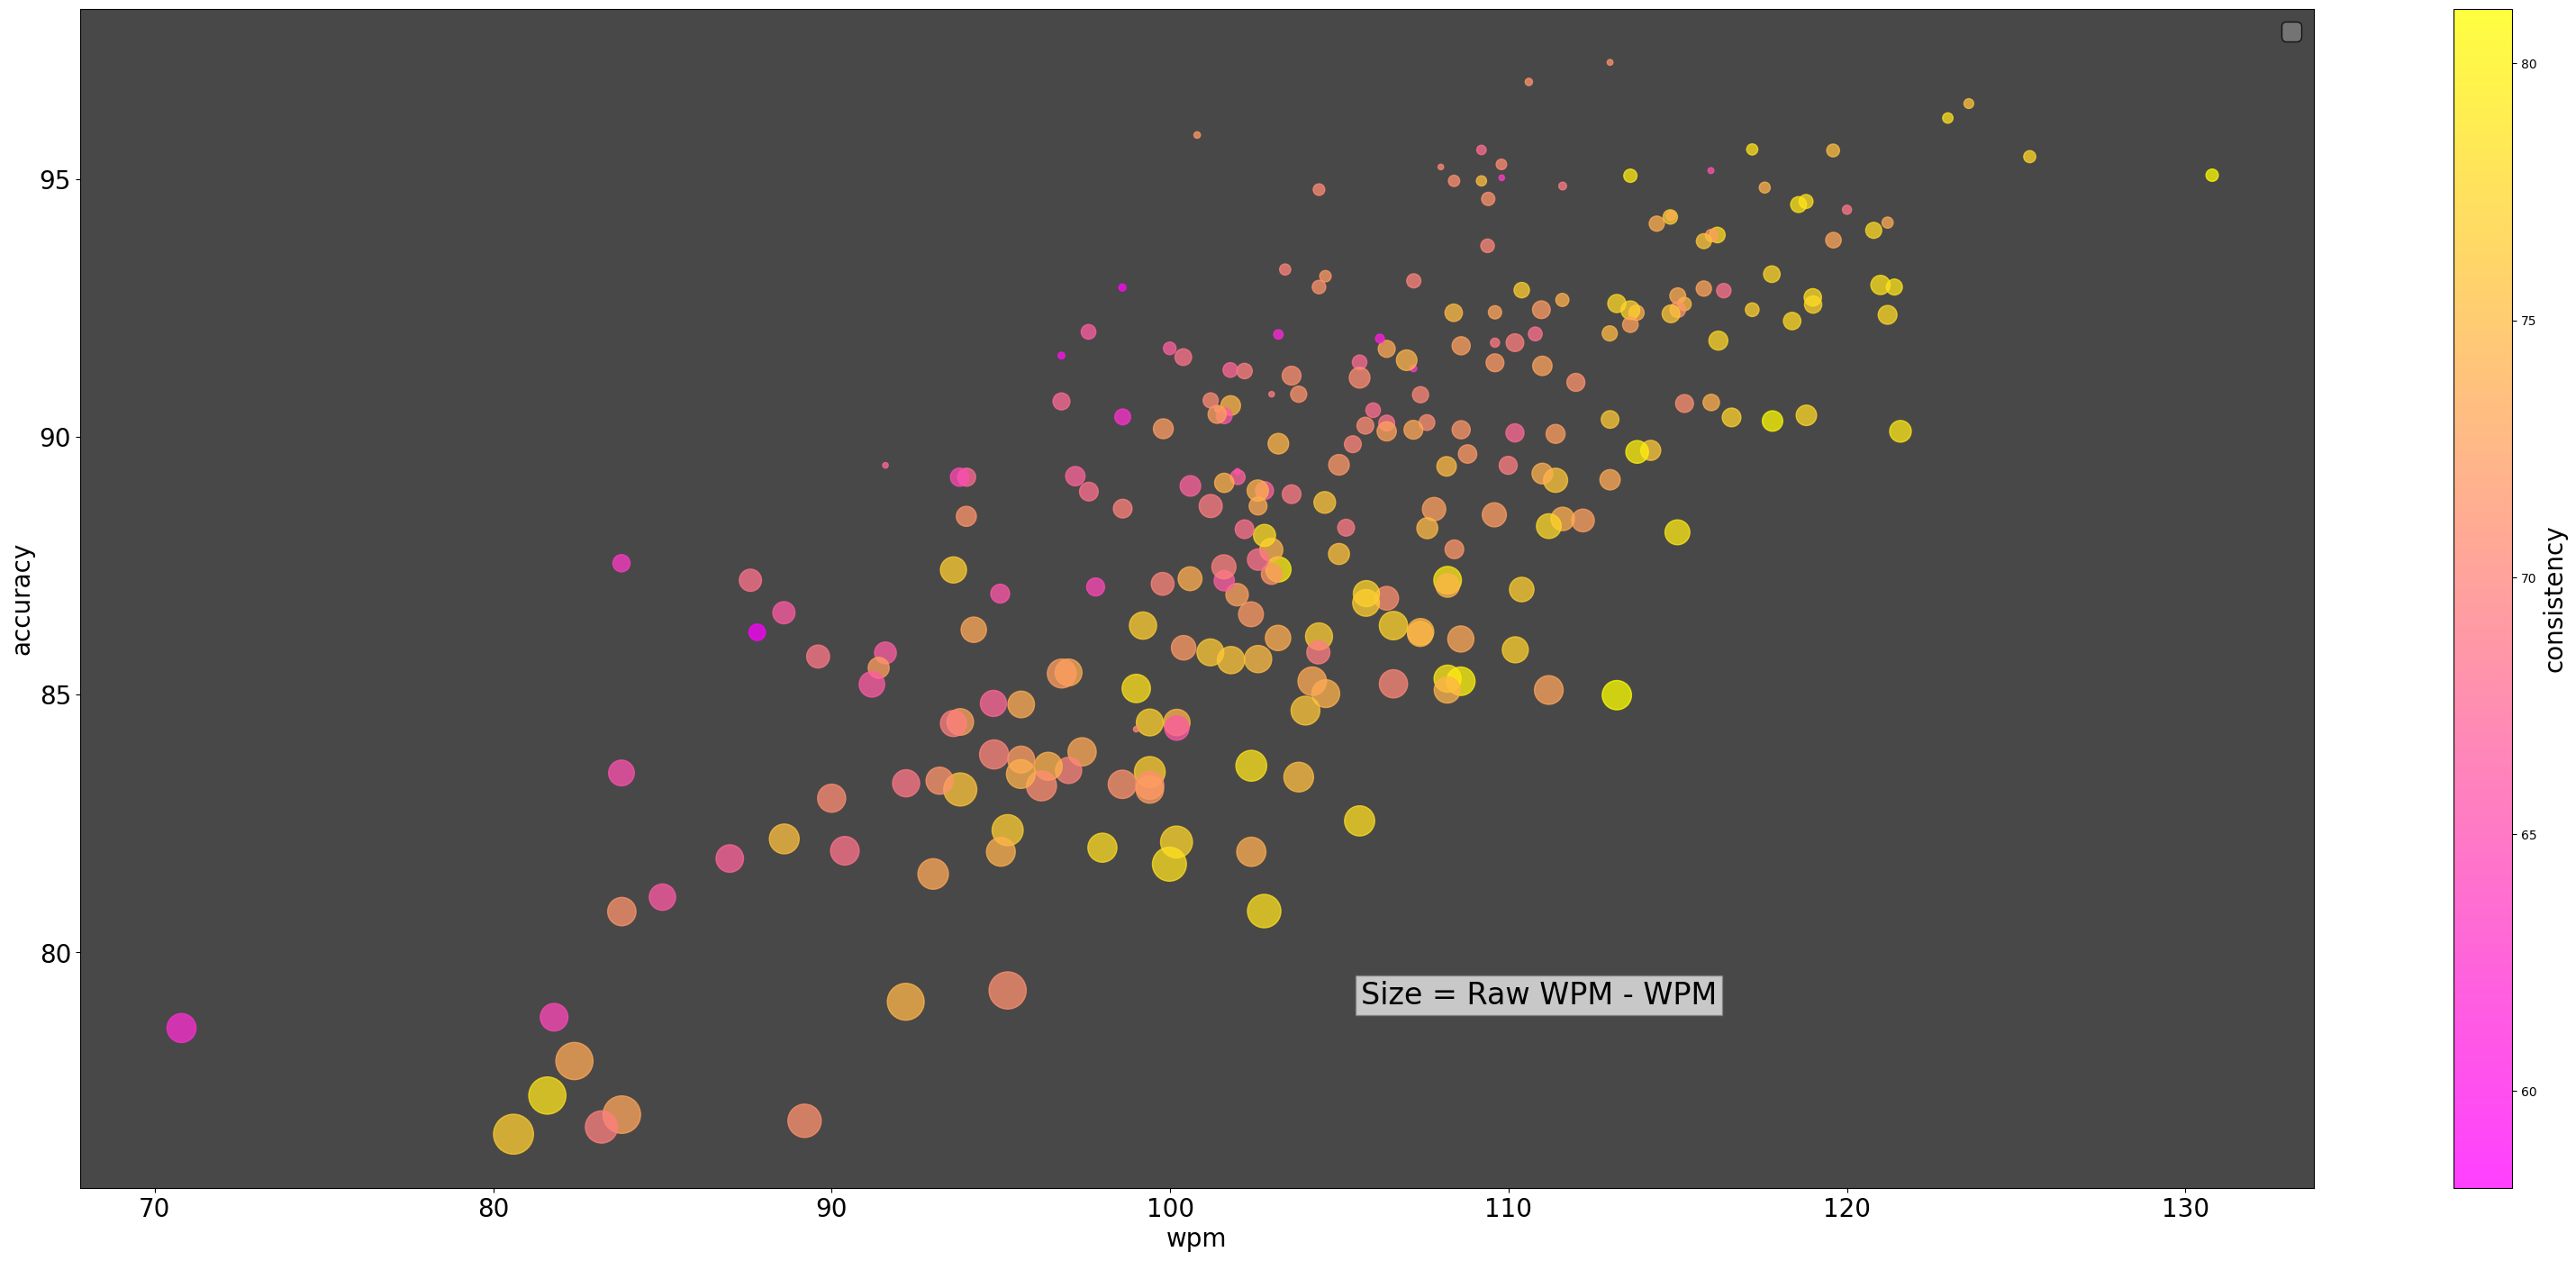

In [8]:
pltscat(df_wpm,'wpm','accuracy','diff','consistency',"Size = Raw WPM - WPM")

C:\Users\conne\AppData\Local\Temp\ipykernel_23668\439492108.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(facecolor=(.5, .5,.5, 0.95), edgecolor='black',fontsize=20)


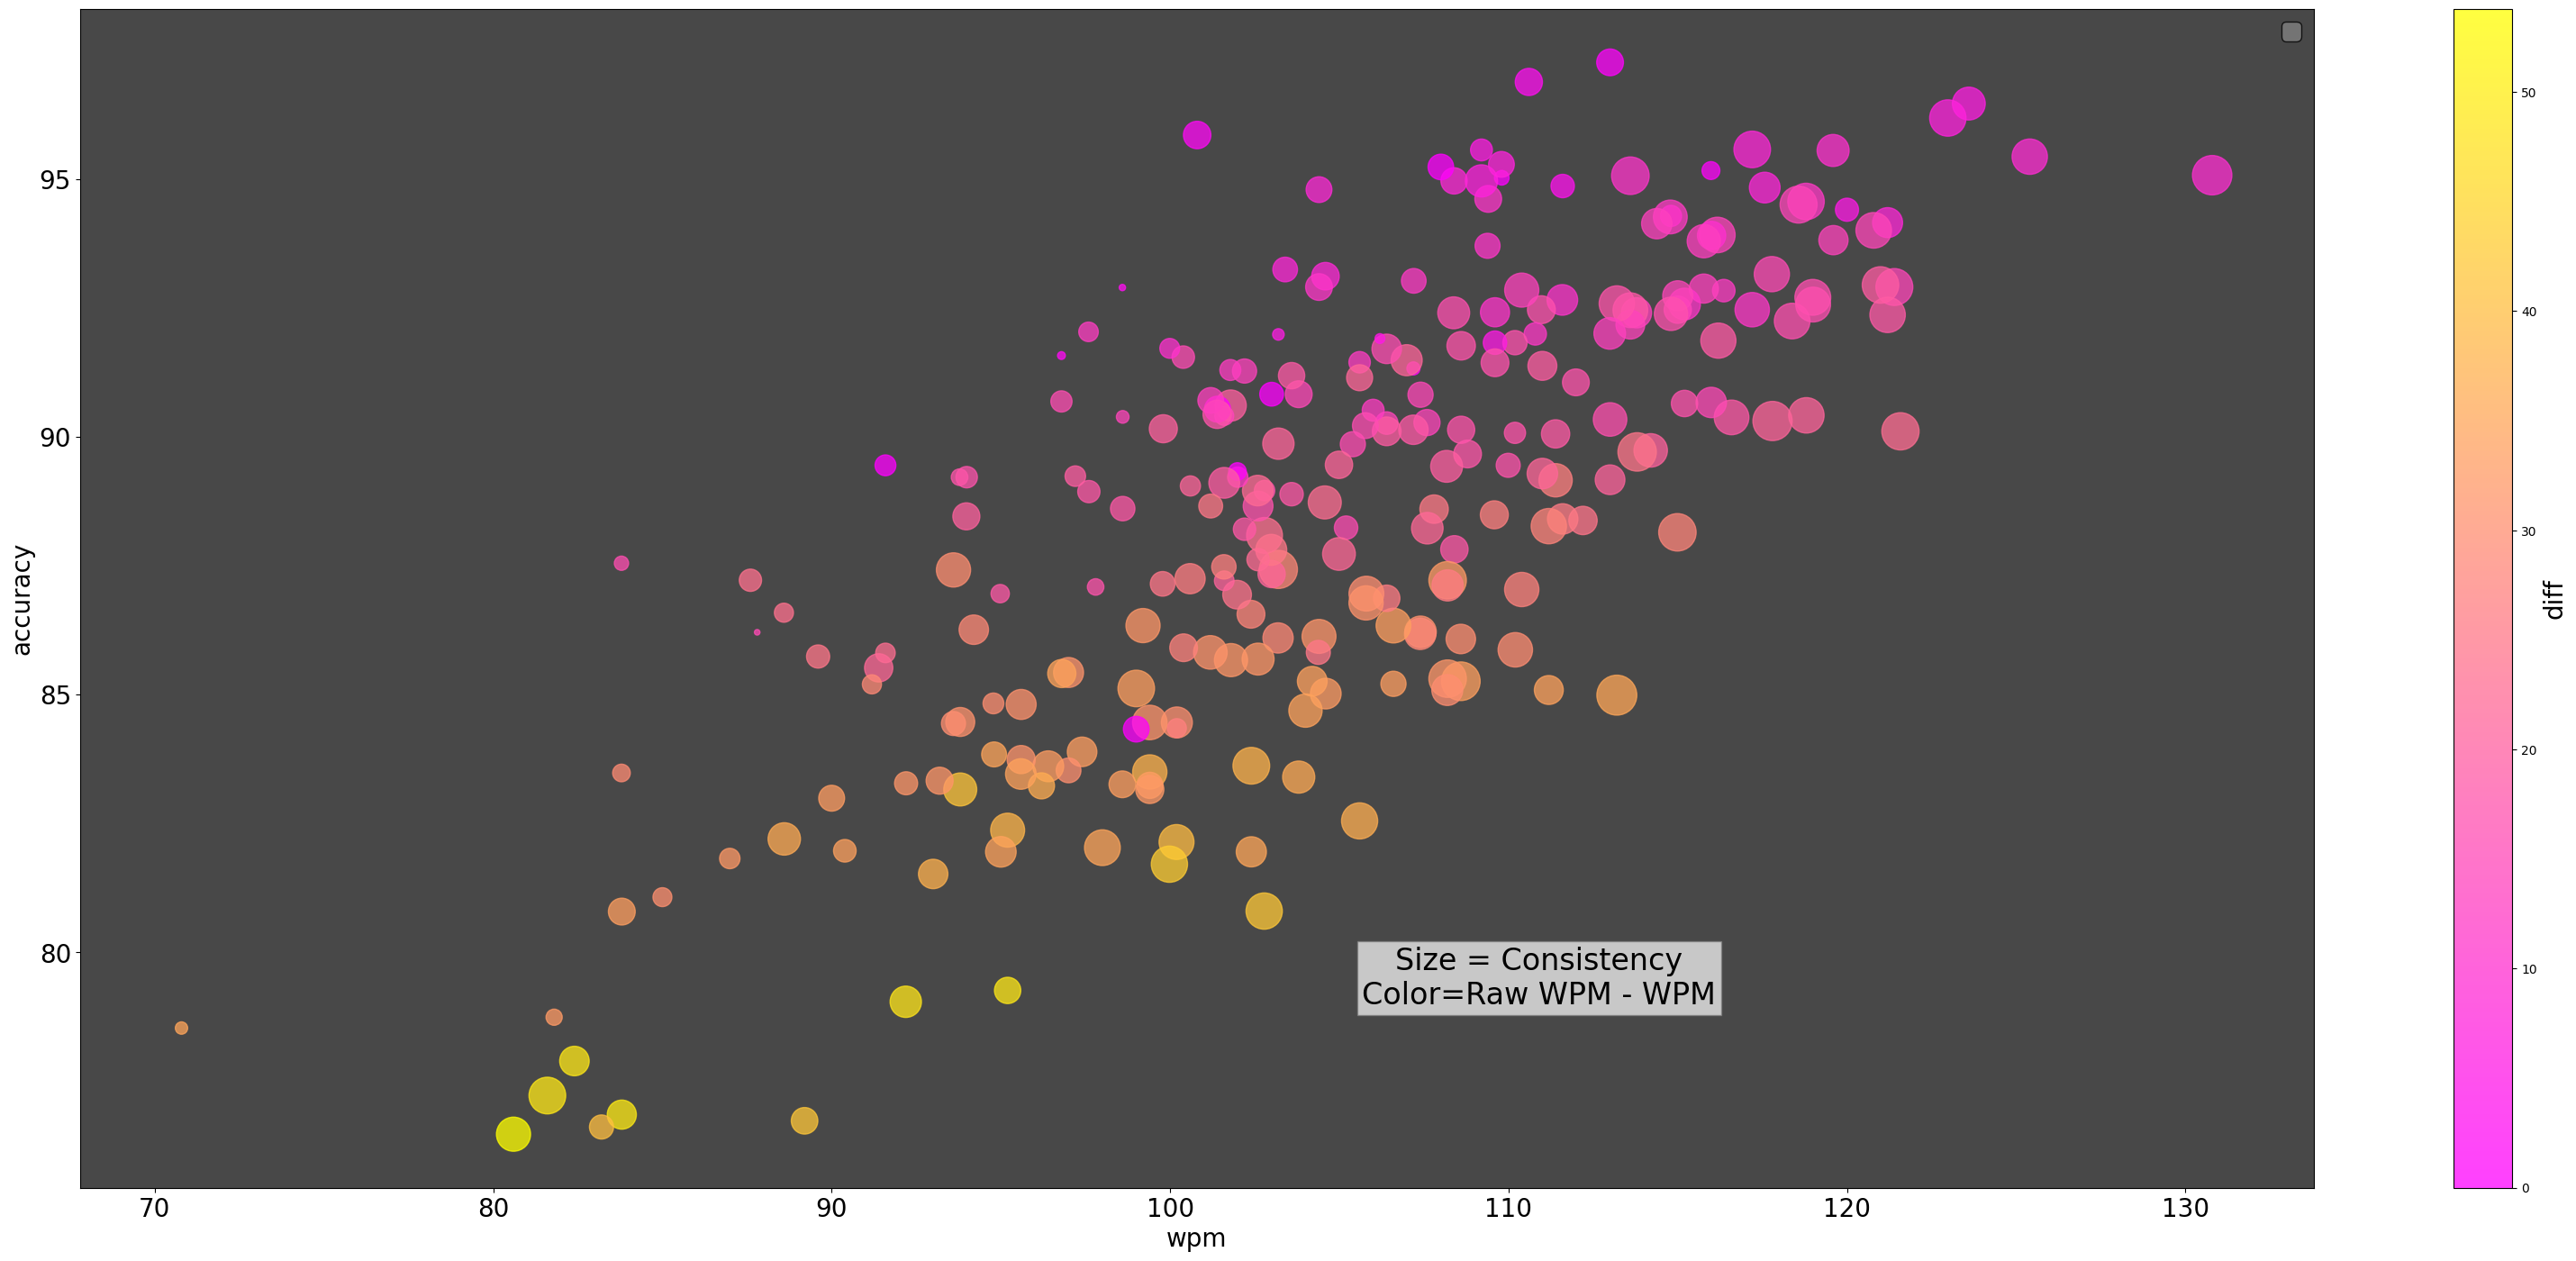

In [9]:
pltscat(df_wpm,'wpm','accuracy','consistency','diff',"Size = Consistency\nColor=Raw WPM - WPM")

C:\Users\conne\AppData\Local\Temp\ipykernel_23668\439492108.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(facecolor=(.5, .5,.5, 0.95), edgecolor='black',fontsize=20)


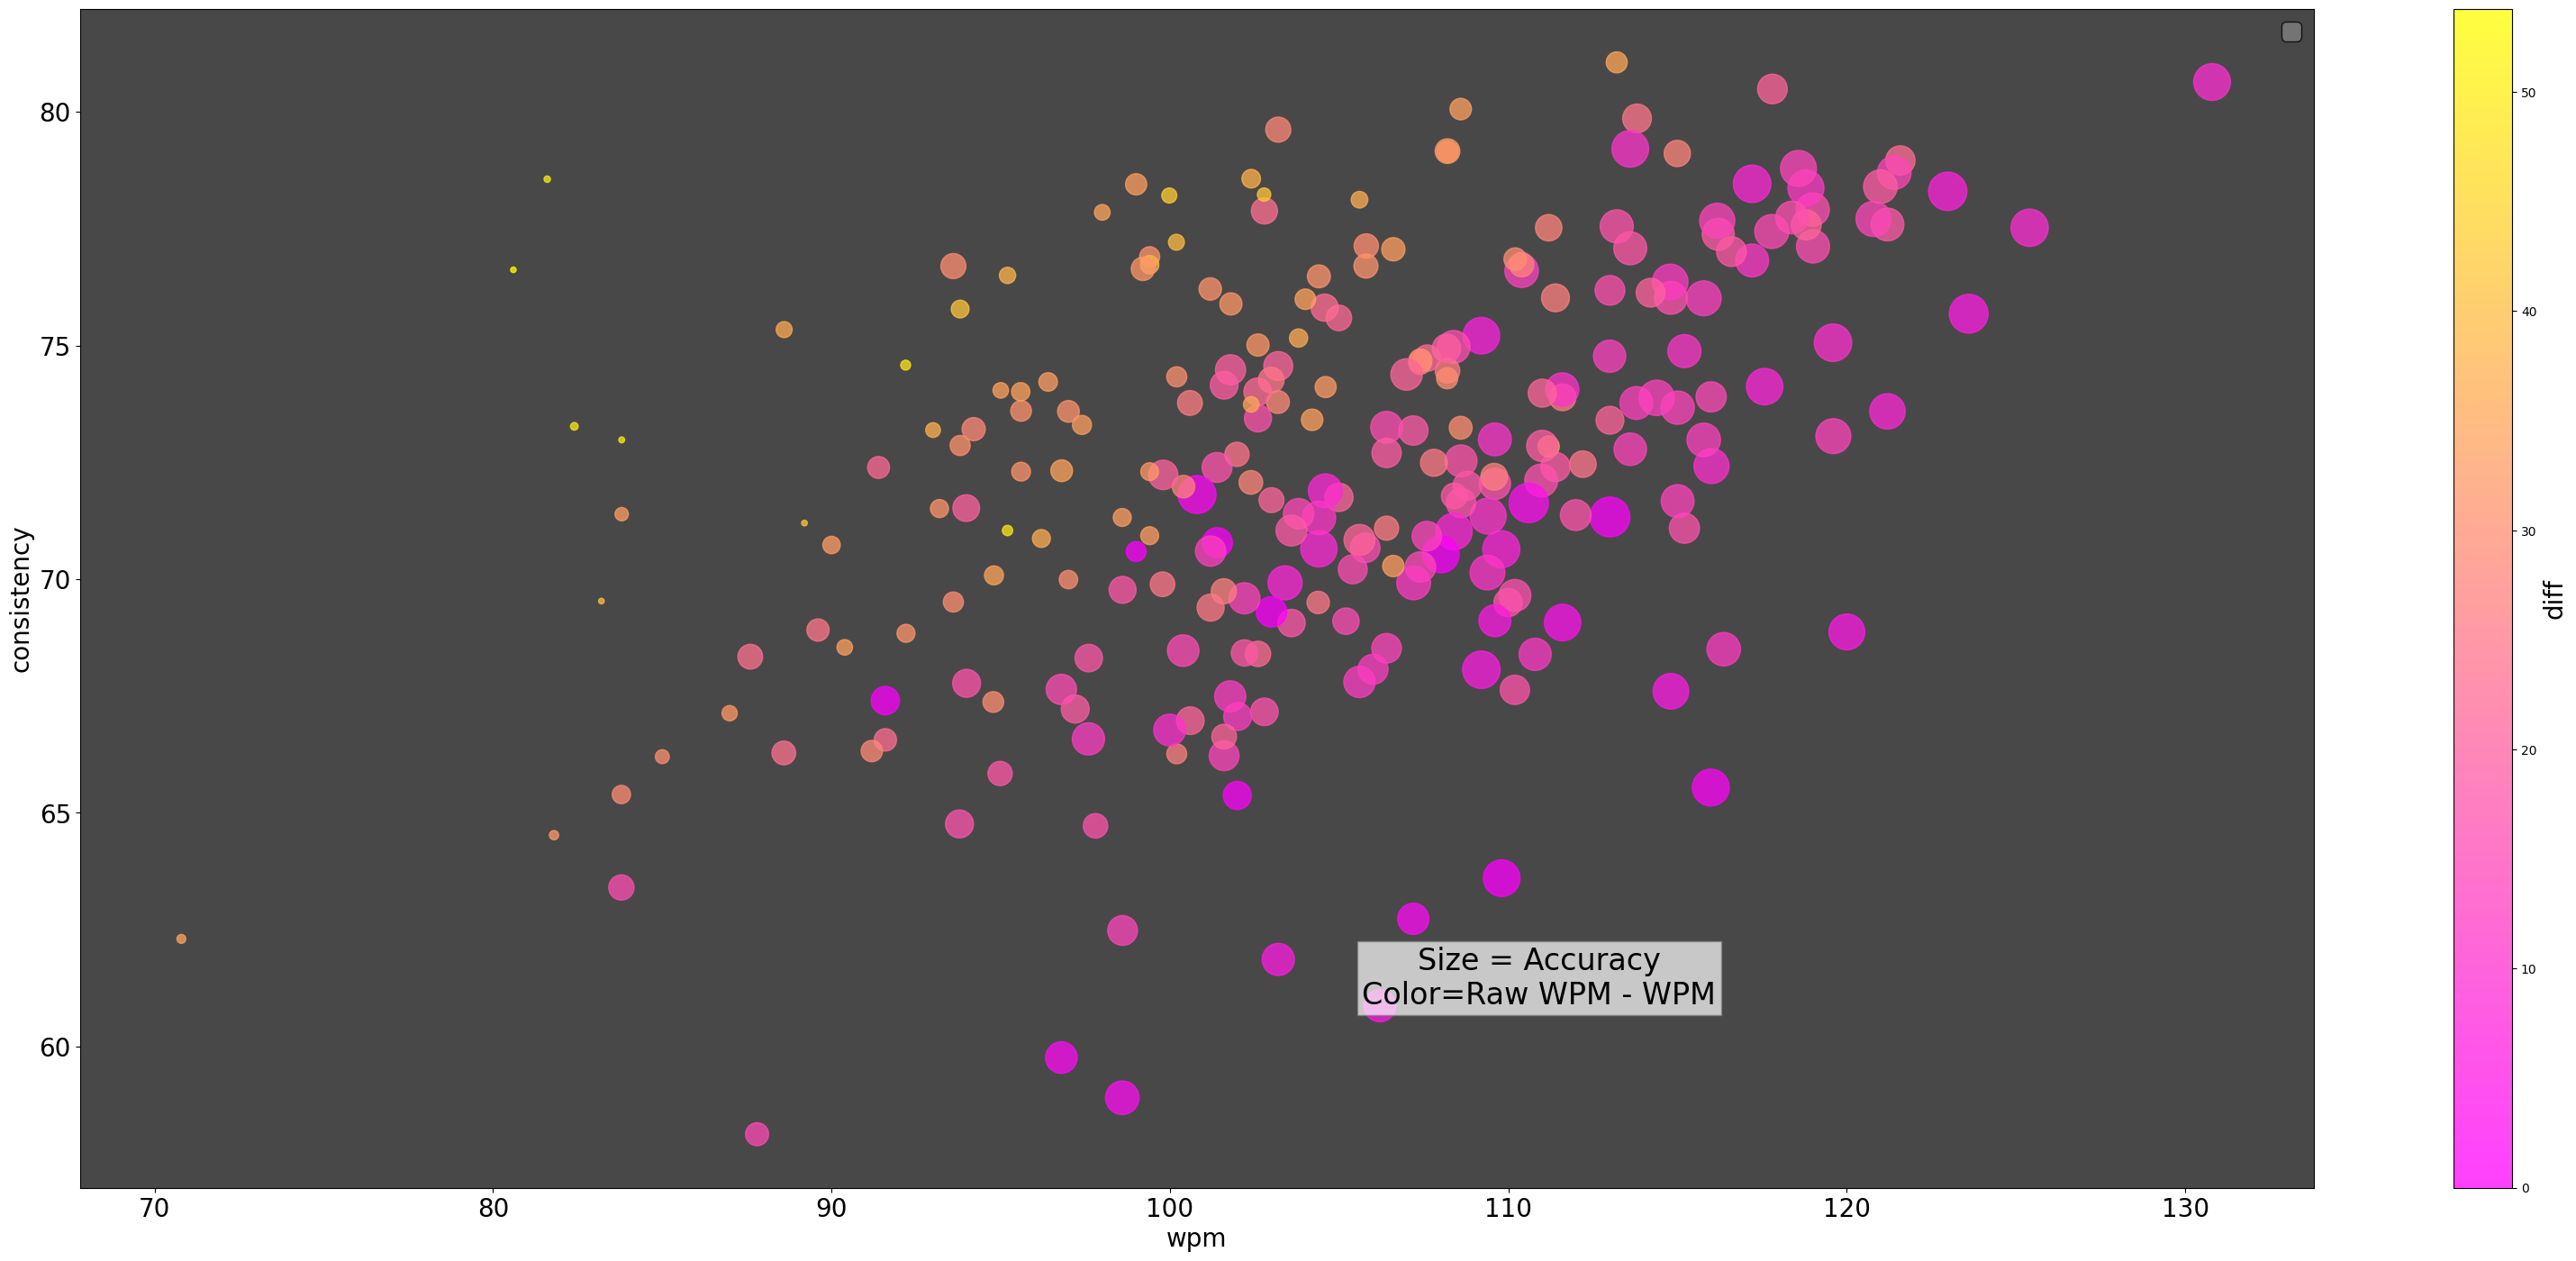

In [10]:
pltscat(df_wpm,'wpm','consistency','accuracy','diff',"Size = Accuracy\nColor=Raw WPM - WPM")

C:\Users\conne\AppData\Local\Temp\ipykernel_23668\439492108.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(facecolor=(.5, .5,.5, 0.95), edgecolor='black',fontsize=20)


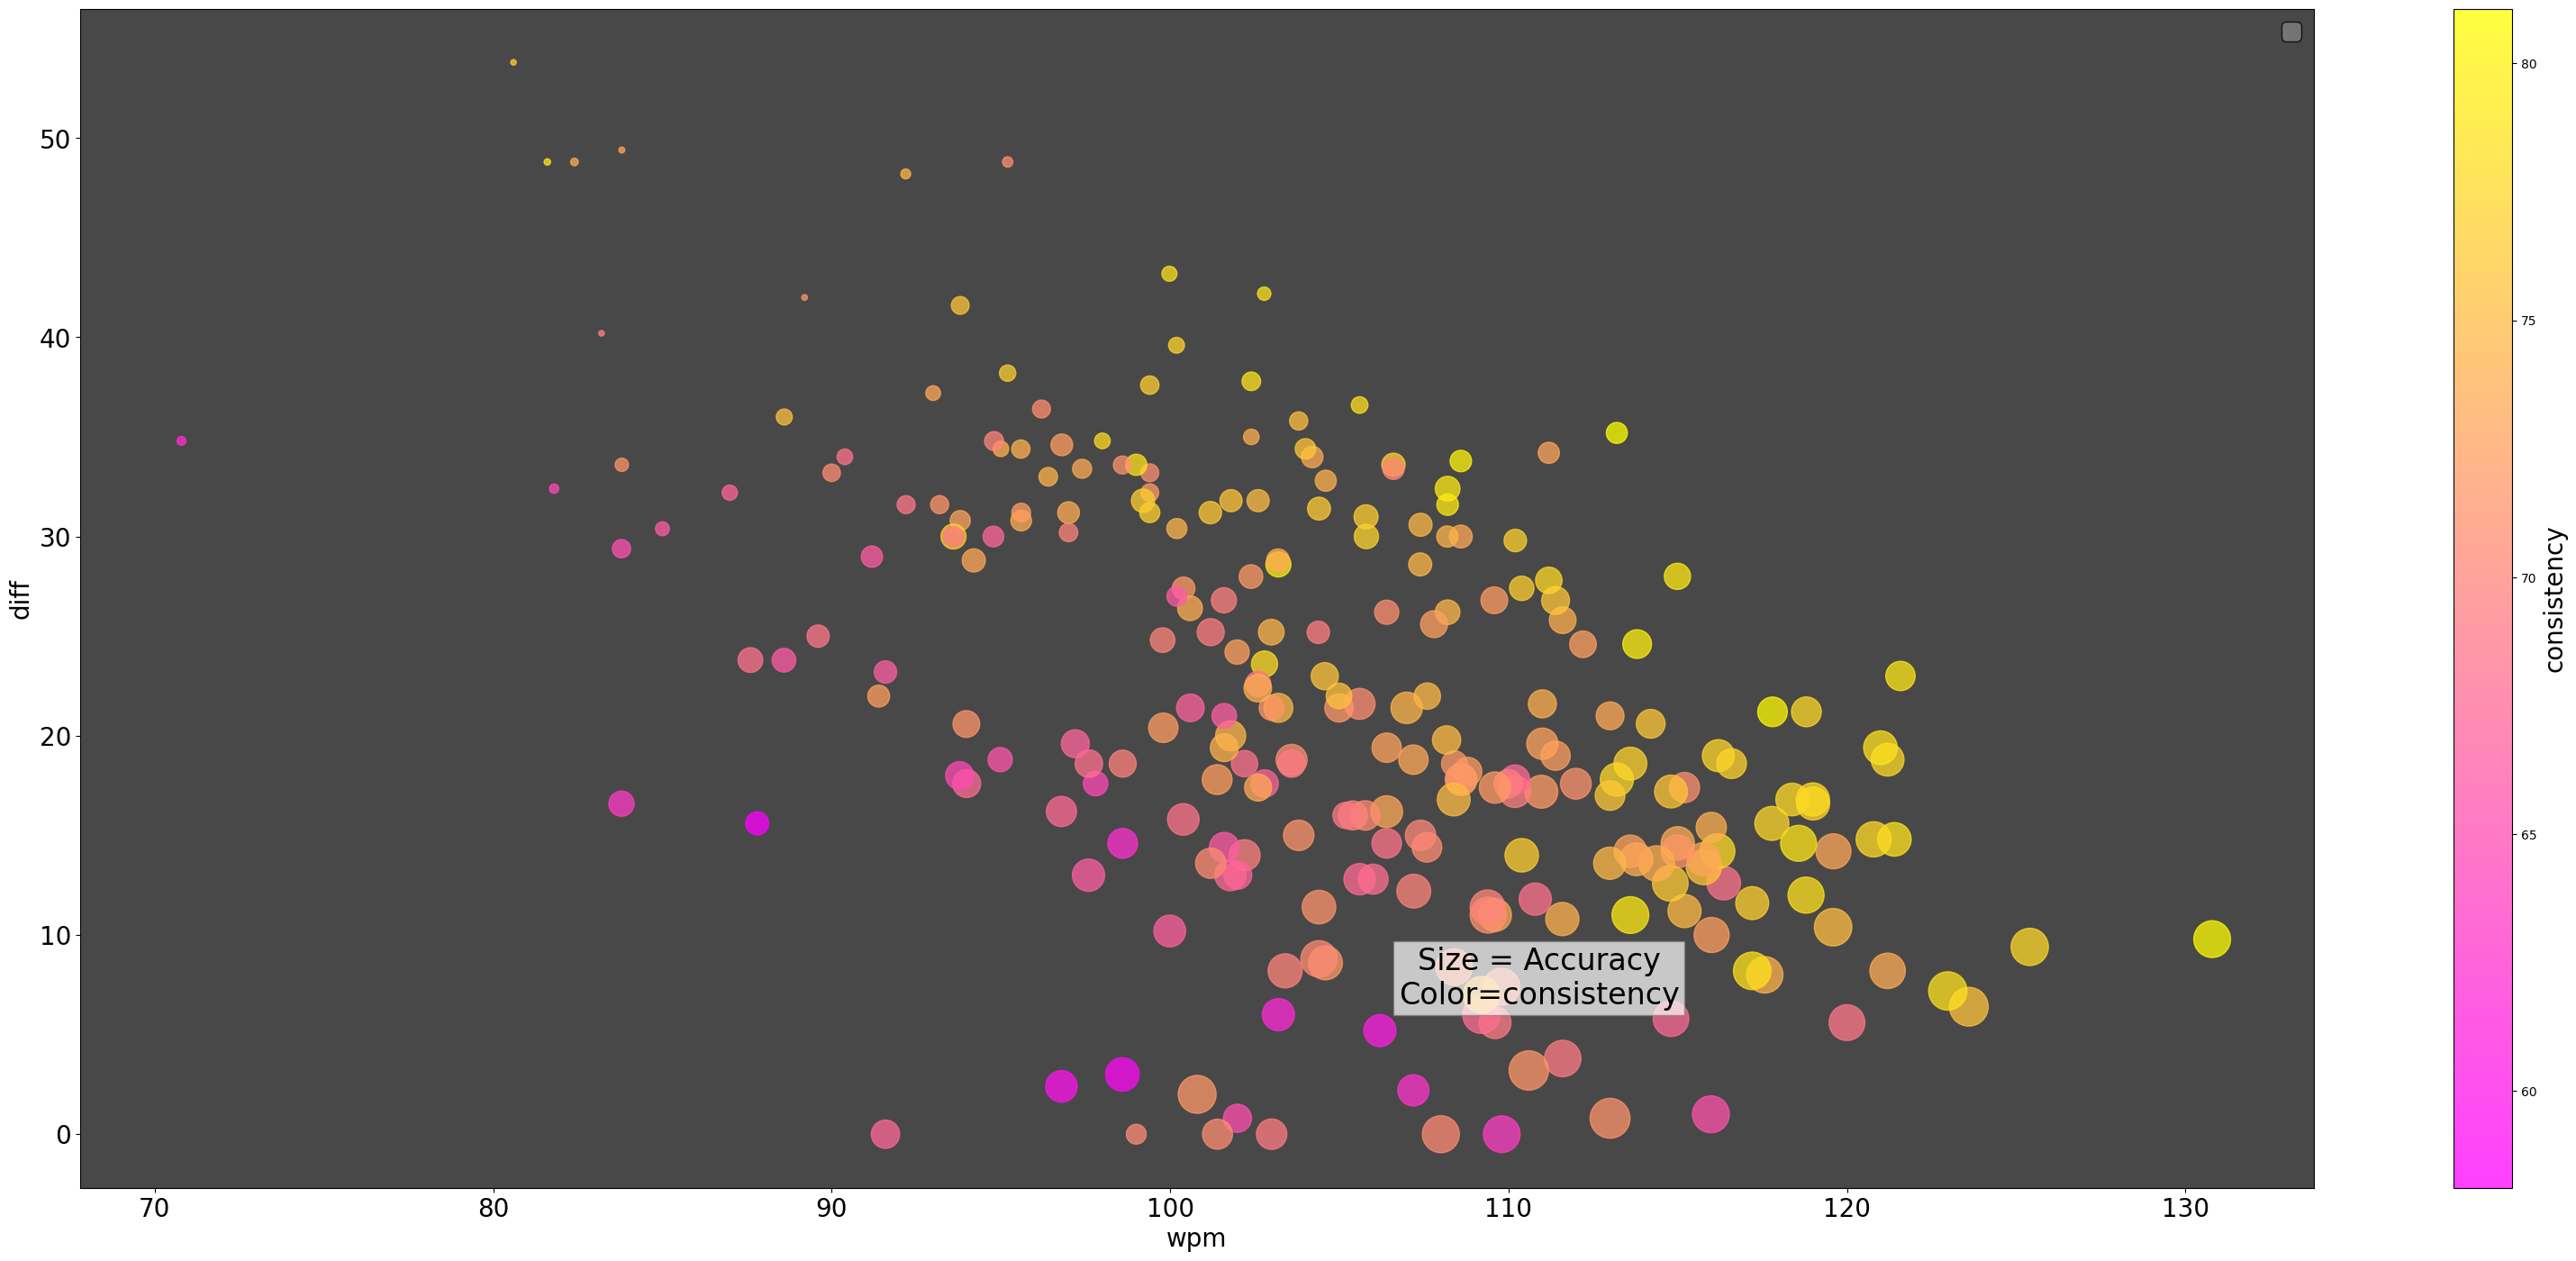

In [11]:
pltscat(df_wpm,'wpm','diff','accuracy','consistency',"Size = Accuracy\nColor=consistency")

In [12]:
def binnify(df,bincol,statcol,bin_size):
    dfp = df.copy()
    dfp['bin'] = pd.cut(dfp[bincol], bins=range(int(dfp[bincol].min()), int(dfp[bincol].max())+1+ bin_size, bin_size))

    # Define the statistics you want to calculate
    stats = {
        'mean': 'mean',
        'min': 'min',
        'max': 'max',
        'med': 'median',
        'cnt': 'count',
        'std': 'std'
    }                         
    
    # Initialize the merged DataFrame with the 'bin' column
    merged_df = dfp.groupby('bin', observed=False).size().reset_index().rename(columns={0: 'size'}).drop(columns=['size'])

    for stat_name, func in stats.items():
            stat_df = dfp.groupby('bin', observed=False)[statcol].agg(func).round(1).reset_index().rename(columns={statcol: stat_name})
            #print(f"Shape of {stat_name} DataFrame: {stat_df.shape}")  # Debugging line
            merged_df = merged_df.merge(stat_df, on='bin', how='left')
    merged_df['b'] = [int(interval.left) for interval in dfp['bin'].cat.categories]
    merged_df = merged_df[merged_df['cnt'] > 0]
    
    return merged_df.reset_index(drop=True)

In [15]:
def statbox(df,bincol,statcol,bin_size):
    
    dfp = df.copy()
    dfp['bin'] = pd.cut(dfp[bincol], bins=range(int(dfp[bincol].min()), int(dfp[bincol].max()) + bin_size+1, bin_size))
    merged_df = binnify(dfp,bincol,statcol,bin_size)
    xwidths = [.95*(w / max(list(merged_df.cnt)))**.5 for w in list(merged_df.cnt)]

    plt.figure(figsize=(10, 6))
    box_plot = sns.boxplot(x='bin', y=statcol, data=dfp, width=xwidths,color='skyblue',linewidth=1,linecolor='black')
    plt.title(f'Box plot of {statcol} by {bincol} with bin size {bin_size}')
    plt.xlabel(bincol)
    plt.ylabel(statcol)
    bin_labels = [f'{int(interval.left)}' for interval in dfp['bin'].cat.categories]

    ex=0
    if bin_size > 2:
        ex=bin_size-2
    
    less_labels = bin_labels[0:len(bin_labels):int((2+ex)/bin_size)]
    plt.xticks(ticks=range(0,len(bin_labels),int((2+ex)/bin_size)), labels=less_labels, rotation=90,fontsize = 10)
    plt.show()


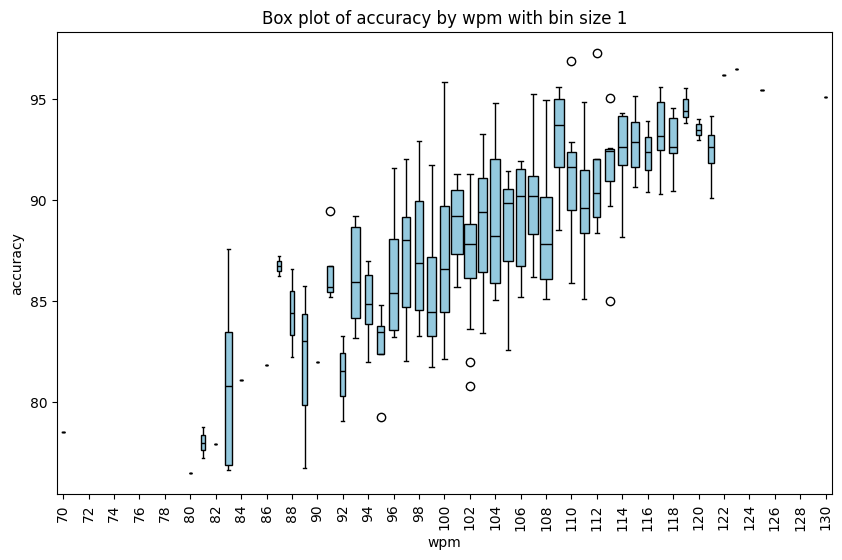

In [16]:
statbox(df_wpm,'wpm','accuracy',1)

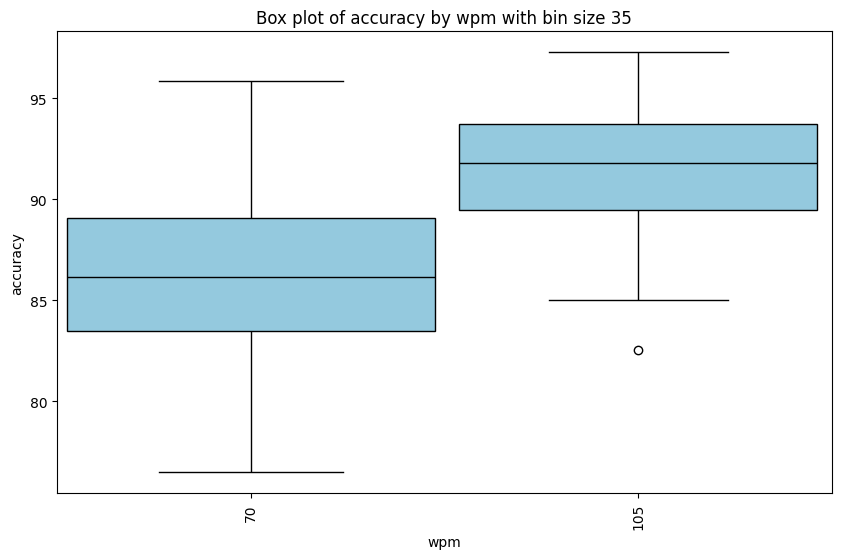

In [17]:
statbox(df_wpm,'wpm','accuracy',35)

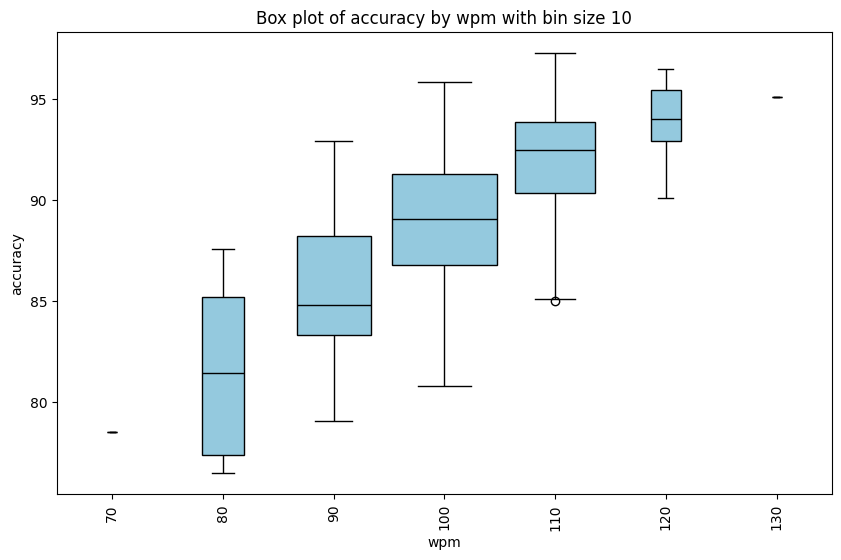

In [18]:
statbox(df_wpm,'wpm','accuracy',10)

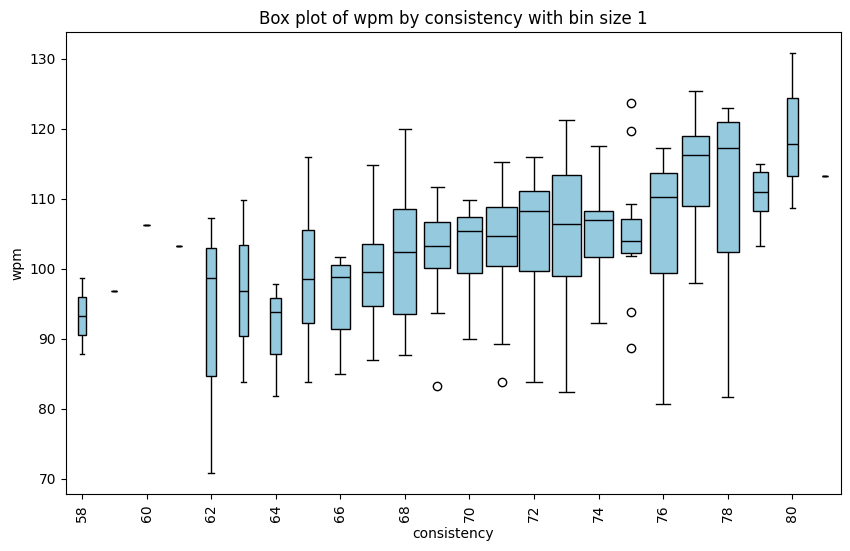

In [32]:
statbox(df_wpm,'consistency','wpm',1)

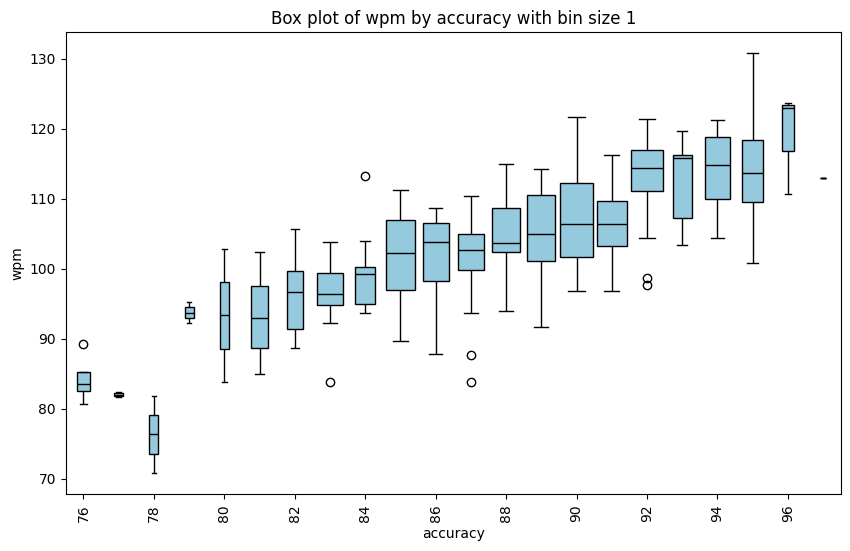

In [33]:
statbox(df_wpm,'accuracy','wpm',1)

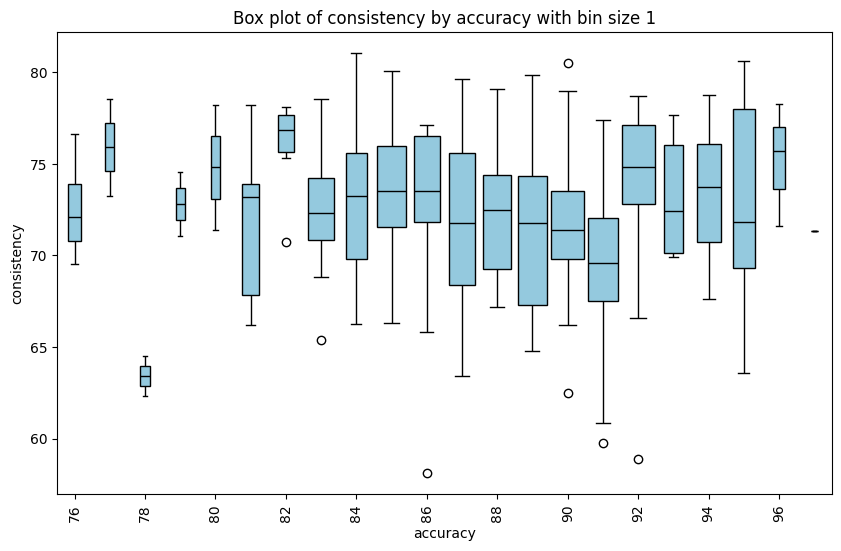

In [35]:
statbox(df_wpm,'accuracy','consistency',1)

In [21]:
def plothisto(df,statcol,filt=""):
    # Plot histogram
    print(f"int(df[statcol].max()-df[statcol].min()) = {(int(df[statcol].max()-df[statcol].min()))}")
    plt.figure(figsize=(10, 6))
    plt.gca().set_facecolor((0.0, .10, .10, 0.95))
    sns.histplot(df[statcol], bins=int(df[statcol].max()-df[statcol].min()), color = '.8', kde=True)
    plt.title(f'Histogram of {statcol} {filt}')
    plt.xlabel(statcol)
    plt.ylabel('Frequency')

    # Calculate mean and standard deviation of the "accuracy" column
    mean_st= df[statcol].mean()
    std_dev_st = df[statcol].std()
    
    plt.axvline(mean_st, color='yellow', linestyle='-', linewidth=1, label='Mean')

    mxdev = 5
    # Adding standard deviation lines
    for i in range(1, mxdev+1):
        plt.axvline(mean_st + i*std_dev_st, color='white',alpha=.8, linestyle=':',linewidth=.5*((mxdev+1)-i)**.48, label=f'{i}σ')
        plt.axvline(mean_st - i*std_dev_st, color='white',alpha=.8, linestyle=':',linewidth=.5*((mxdev+1)-i)**.48)


    plt.legend(facecolor=(.50, .41,.3, 0.15), edgecolor='black')

    

    # Set x-ticks to align with standard deviation thresholds
    std_devs = [mean_st + i*std_dev_st for i in range(-mxdev, mxdev+1)]
    plt.xticks(std_devs, [f'{mean_st + i*std_dev_st:.2f}' for i in range(-mxdev, mxdev+1)])
    plt.xlim(df[statcol].min()-2,df[statcol].max()+1)

    
    plt.show()

int(df[statcol].max()-df[statcol].min()) = 59


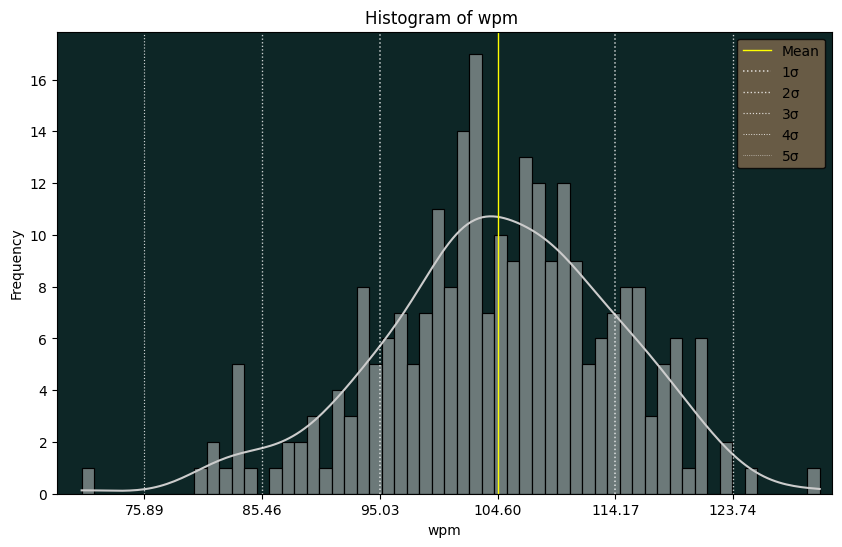

In [25]:
plothisto(df_wpm,'wpm')

int(df[statcol].max()-df[statcol].min()) = 20


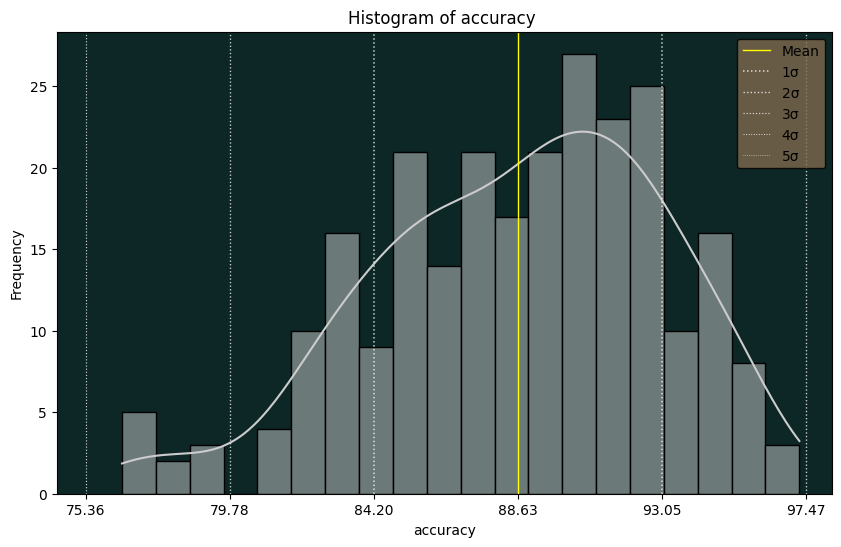

In [22]:
plothisto(df_wpm,'accuracy')

int(df[statcol].max()-df[statcol].min()) = 22


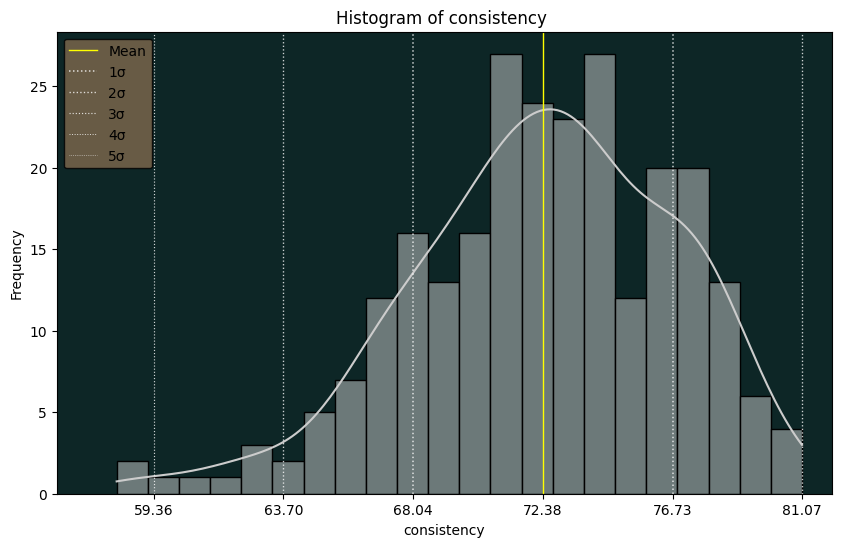

In [23]:
plothisto(df_wpm,'consistency')

In [24]:
df_wpm[['wpm','raw','accuracy','consistency','diff']].corr()

,wpm,raw,accuracy,consistency,diff
wpm,1.000000,0.384866,0.747905,0.443219,-0.521863
raw,0.384866,1.000000,-0.254367,0.756966,0.586475
accuracy,0.747905,-0.254367,1.000000,-0.006821,-0.891426
consistency,0.443219,0.756966,-0.006821,1.000000,0.310650
diff,-0.521863,0.586475,-0.891426,0.310650,1.000000
